# Data Analysis and Visualization of IMU Data

This code was developed to analyze data and generate figures for "Evaluating Mouse Control and Usability Patterns Across Tremor and Non-Tremor Populations"

### Loading necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

### Processing Functions

In [2]:
# Define FFT
def simpleFFT(fs, signal):
    N = len(signal)
    f = fs / N * np.arange(N)
    F_signal = np.fft.fft(signal) / N
    freqs = f[:N // 2]
    f_amp = np.abs(F_signal[:N // 2])
    return freqs, f_amp

### Gyroscopic Data

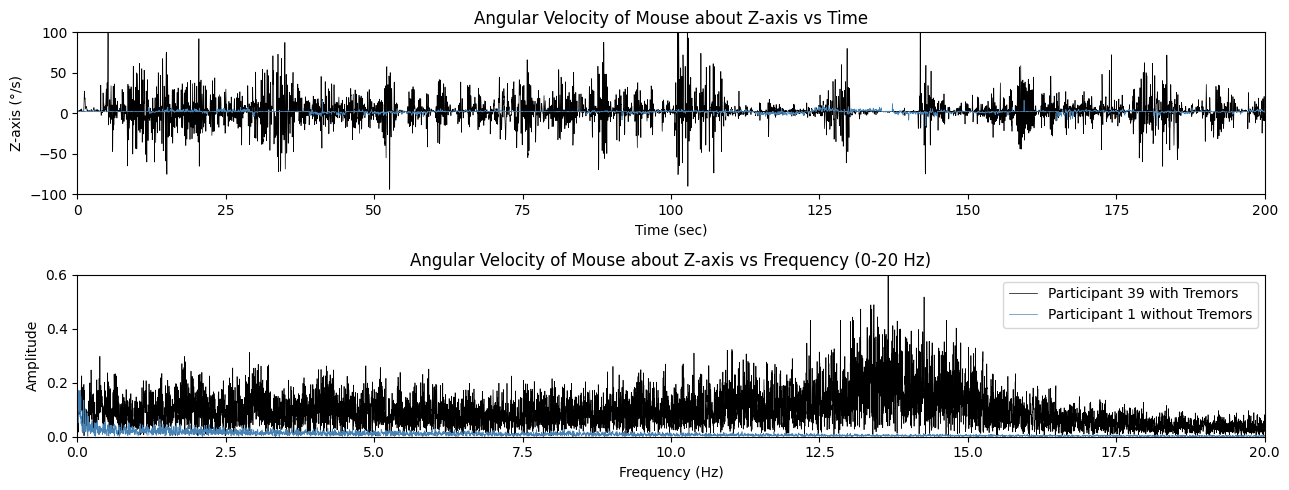

In [3]:
# Load IMU data
P39 = pd.read_csv("./data/TestTaker39.csv")
P39.columns = P39.columns.str.strip()

P1 = pd.read_csv("./data/TestTaker1.csv")
P1.columns = P1.columns.str.strip()


# Extract Gyro Z-axis
P39_t = P39["Timestamp"].values
P39_Z = P39["GyroZ"].values

P1_t = P1["Timestamp"].values
P1_Z = P1["GyroZ"].values

# Sampling rate
P39_fs = 1 / (P39_t[1] - P39_t[0])
P39_f, P39_f_amp = simpleFFT(P39_fs, P39_Z)

P1_fs = 1 / (P1_t[1] - P1_t[0])
P1_f, P1_f_amp = simpleFFT(P1_fs, P1_Z)

# Plot
plt.figure(figsize=(13, 5))

# Time Domain
plt.subplot(2, 1, 1)
plt.plot(P39_t, P39_Z, linewidth=0.5, color='black')
plt.plot(P1_t, P1_Z, linewidth=0.5, color='steelblue')
plt.xlim(0, 200)
plt.ylim(-100, 100)
plt.xlabel("Time (sec)")
plt.ylabel("Z-axis (°/s)")
plt.title("Angular Velocity of Mouse about Z-axis vs Time")

# Frequency Domain
plt.subplot(2, 1, 2)
plt.plot(P39_f, P39_f_amp, linewidth=0.5, color='black')
plt.plot(P1_f, P1_f_amp, linewidth=0.5, color='steelblue')
plt.xlim(0, 20)
plt.ylim(0, .6)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(['Participant 39 with Tremors', 'Participant 1 without Tremors'])
plt.title("Angular Velocity of Mouse about Z-axis vs Frequency (0-20 Hz)")

plt.tight_layout()
plt.show()


### Acceleration Data

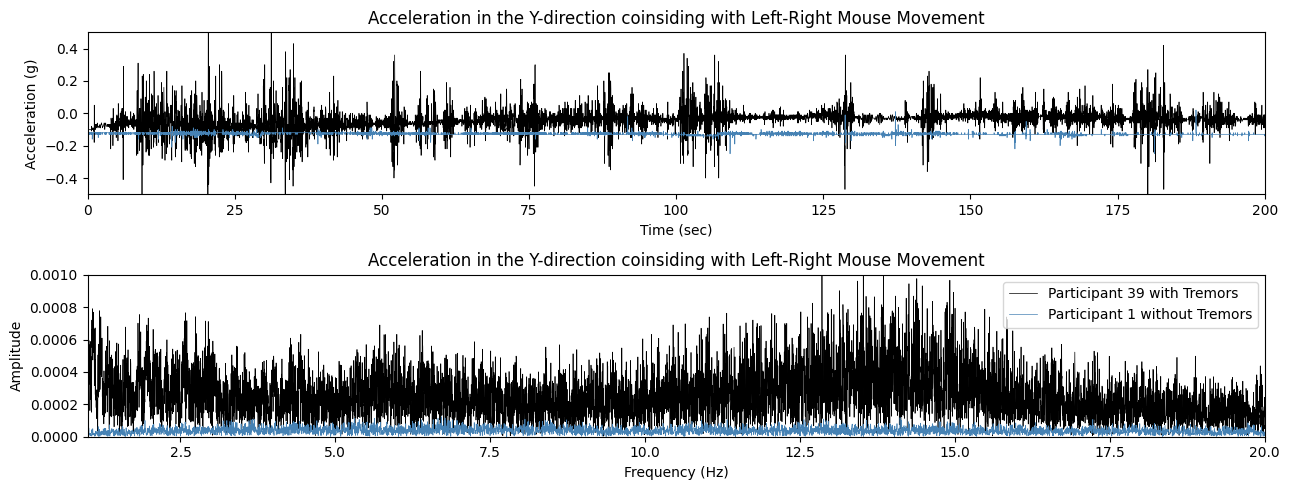

In [4]:
# Load IMU data
P39 = pd.read_csv("./data/TestTaker39.csv")
P39.columns = P39.columns.str.strip()

P1 = pd.read_csv("./data/TestTaker1.csv")
P1.columns = P1.columns.str.strip()

# Extract Acceleration XY axes
P39_t = P39["Timestamp"].values
P39_X = -P39["AccX"].values
P39_Y = -P39["AccY"].values

P1_t = P1["Timestamp"].values
P1_X = -P1["AccX"].values
P1_Y = -P1["AccY"].values

# Sampling rate
P39_fs = 1 / (P39_t[1] - P39_t[0])
P39_f, P39_f_amp = simpleFFT(P39_fs, P39_X)

P1_fs = 1 / (P1_t[1] - P1_t[0])
P1_f, P1_f_amp = simpleFFT(P1_fs, P1_X)

# Plot
plt.figure(figsize=(13, 5))

# Time Domain
plt.subplot(2, 1, 1)
# plt.plot(P39_t, P39_X, linewidth=0.5, color='tab:gray')
# plt.plot(P1_t, P1_X, linewidth=0.5, color='tab:blue')
plt.plot(P39_t, P39_Y, linewidth=0.5, color='black')
plt.plot(P1_t, P1_Y, linewidth=0.5, color='steelblue')
plt.xlim(0, 200)
plt.ylim(-0.5, 0.5)
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (g)")
plt.title("Acceleration in the Y-direction coinsiding with Left-Right Mouse Movement")

# Frequency Domain
plt.subplot(2, 1, 2)
plt.plot(P39_f, P39_f_amp, linewidth=0.5, color='black')
plt.plot(P1_f, P1_f_amp, linewidth=0.5, color='steelblue')
plt.legend(['Participant 39 with Tremors', 'Participant 1 without Tremors'])
plt.xlim(1, 20)
plt.ylim(0.0, 0.001)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Acceleration in the Y-direction coinsiding with Left-Right Mouse Movement")

plt.tight_layout()
plt.show()